## Tutorial 1: Setup, Installation, and Simulation
### January 12, 2023

#### What are Python and NumPy?

In [145]:
import numpy as np
import pandas as pd

In [4]:
a = np.array([3])

In [5]:
a

array([3])

In [6]:
np.shape( a )

(1,)

In [7]:
3*a + 5

array([14])

#### Arrays in NumPy

In [9]:
a = np.zeros(5)

In [10]:
a[0] = 2; a[1] = 6; a[2] = 4; a[3] = 8; a[4] = 24
a

array([ 2.,  6.,  4.,  8., 24.])

In [11]:
a = np.zeros( (5,5) )
a

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [13]:
(a-3) * (-2)

array([[6., 6., 6., 6., 6.],
       [6., 6., 6., 6., 6.],
       [6., 6., 6., 6., 6.],
       [6., 6., 6., 6., 6.],
       [6., 6., 6., 6., 6.]])

#### Logistic Map

Text(0, 0.5, 'x')

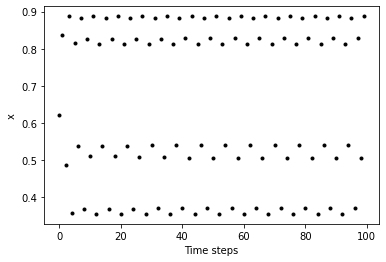

In [39]:
import matplotlib.pyplot as plt

## Defining parameters
a = 3.55; x0 = 0.62; nsteps = 100;

## Initializing an array of zeros
x = np.zeros(nsteps); x[0] = x0;

## Running simulation
for ii in np.arange(1,nsteps): 
    x[ii] = a * x[ii-1] * (1 - x[ii-1])

# plot results
plt.plot(x, 'k.'); plt.xlabel('Time steps'); plt.ylabel('x')

#### Problem 1: How do trajectories from slightly different starting points diverge?

In [121]:
## Defining a function that accepts arguments "a", "x0", "nsteps", and "print_step"
def problem_1(a, x0, nsteps, print_step):
    
    ## Initializing the arrays of zeros
    x = np.zeros(nsteps); x[0] = x0
    x2 = np.zeros(nsteps); x2[0] = x0 + np.finfo(float).eps
    
    ## Running simulations
    for ii in np.arange(1,nsteps):
        x[ii] = a * x[ii-1] * (1 - x[ii-1])
        x2[ii] = a * x2[ii-1] * (1 - x2[ii-1])
    
    #print(((np.abs(x-x2))[print_step]))
    
    ## Plotting x and x2
    plt.plot(x); plt.plot(x2); plt.xlabel('Time steps'); plt.ylabel('Values')
    
    ## Plotting (x-x2)
    #plt.plot(x - x2); plt.xlabel('Time steps'); plt.ylabel('Values')

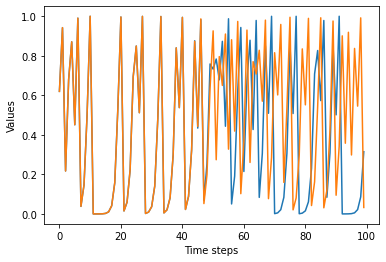

In [122]:
res = problem_1(4, 0.62, 100, 66)

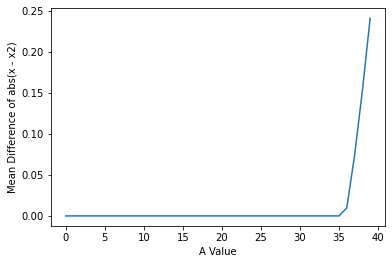

In [130]:
## Creating a plot that illustrates the average difference between two trajectories over many realizations

def problem_1b(a_array, x0, nsteps):
    
    ## Initializing arrays to store results
    x_array = np.array([])
    
    for a in a_array:
        
        ## Initializing the arrays of zeros
        x = np.zeros(nsteps); x[0] = x0
        x2 = np.zeros(nsteps); x2[0] = x0 + np.finfo(float).eps
        
        ## Running simulations
        for ii in np.arange(1,nsteps):
            x[ii] = a * x[ii-1] * (1 - x[ii-1])
            x2[ii] = a * x2[ii-1] * (1 - x2[ii-1])
            
        ## Appending results
        x_array = np.append(x_array, np.mean(np.abs(x-x2)));
        
    ## Plotting differences
    plt.plot(x_array); plt.xlabel('A Value'); plt.ylabel('Mean Difference of abs(x - x2)')

## Defining all possible a values
a_values = np.arange(0.1, 4.1, 0.1)

## Running simulations
problem_1b(a_values, 0.62, 100)

#### Problem 2: Compare results with analytical solution at a=4

In [137]:
## Defining a function that accepts arguments "a", "x0", "nsteps", and "print_step"
def problem_2(a, x0, nsteps, print_step):
    
    ## Initializing the arrays of zeros
    x = np.zeros(nsteps); x[0] = x0
    x2 = np.zeros(nsteps)
    
    ## Running simulations for numerical solution
    for ii in np.arange(1,nsteps):
        x[ii] = a * x[ii-1] * (1 - x[ii-1])
    
    ## Running analytical solution
    for ii in np.arange(0, nsteps):
        x2[ii] = 0.5 * (1 - np.cos(2**ii * np.arccos(1 - 2*x0)))
    
    ## Plotting result
    plt.plot(x); plt.plot(x2); plt.xlabel('Time steps'); plt.ylabel('x - x2')

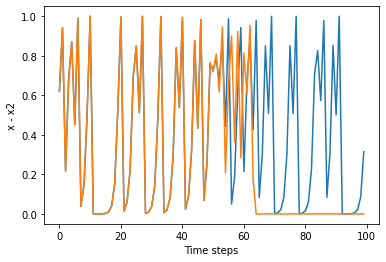

In [138]:
problem_2(4, 0.62, 100, 30)

An interesting exercise is to compare the numerical and analytical solutions with a finer time axis for the analytical. How do the two plots compare in this case?

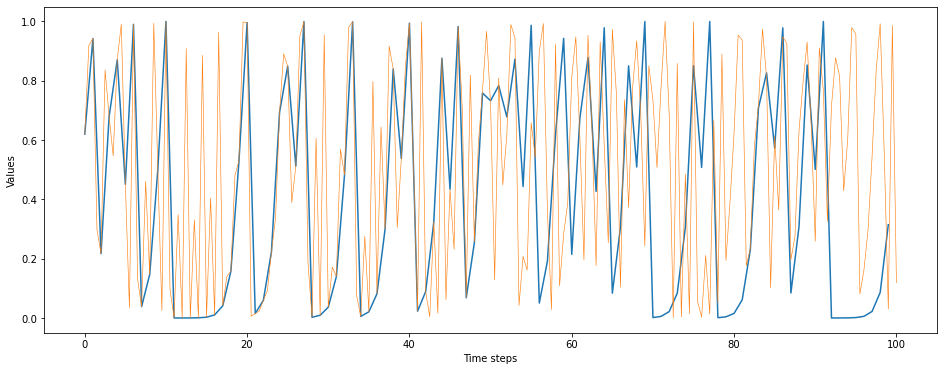

In [158]:
## Comparing the numerical and analytical solutions with a finer time axis for the analytical

def problem_2b(a, x0, nsteps, times):
    
    ## Initializing the arrays of zeros
    x = np.zeros(nsteps); x[0] = x0
    x2 = np.zeros(len(times))
    
    ## Running simulations for numerical solution
    for ii in np.arange(1,nsteps):
        x[ii] = a * x[ii-1] * (1 - x[ii-1])
    
    ## Running analytical solution
    for ii in range(0, len(times)):
        x2[ii] = 0.5 * (1 - np.cos(2**times[ii] * np.arccos(1 - 2*x0)))
    
    ## Creating results data-frame
    results = pd.DataFrame({'step':np.arange(0,nsteps), 'x':x})
    results2 = pd.DataFrame({'step':times, 'x':x2})
    
    ## Plotting result
    plt.figure(figsize=(16, 6))
    plt.plot(results['step'], results['x']); plt.plot(results2['step'], results2['x'], linewidth = 0.6); 
    plt.xlabel('Time steps'); plt.ylabel('Values')

problem_2b(4, 0.62, 100, np.arange(0, 100.1, 0.5))